In [3]:
from models import *
from samplers import *
from tasks import ChebyshevKernelLinearRegression, ChebyshevKernelLeastSquaresModelWithRidge
from matplotlib import pyplot as plt
import numpy as np
import os
from eval import *

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 1])


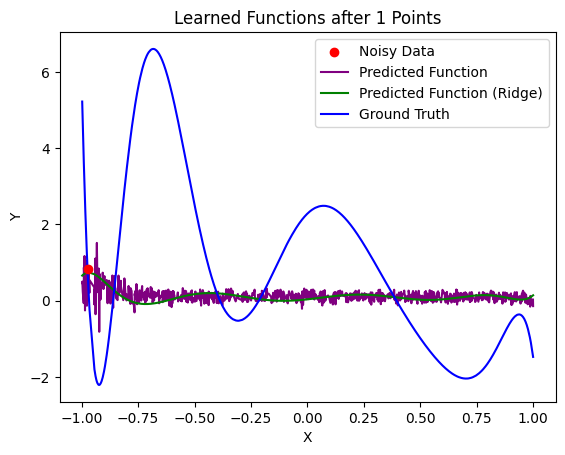

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 6])


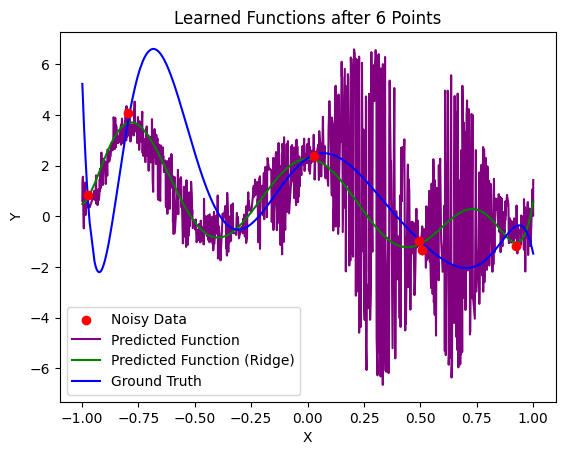

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 11])


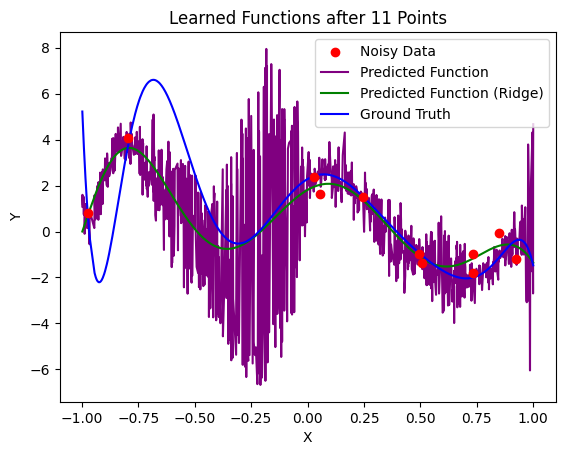

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 16])


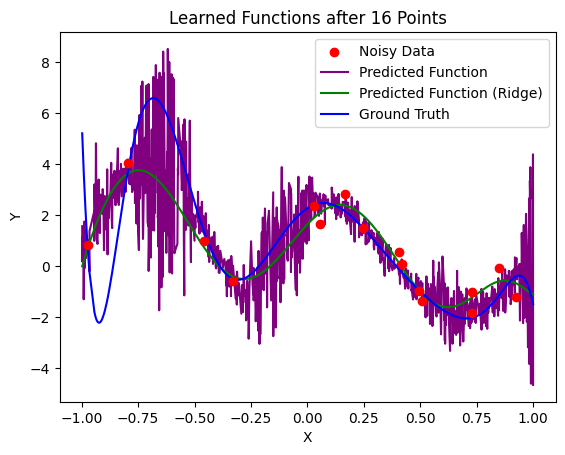

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 21])


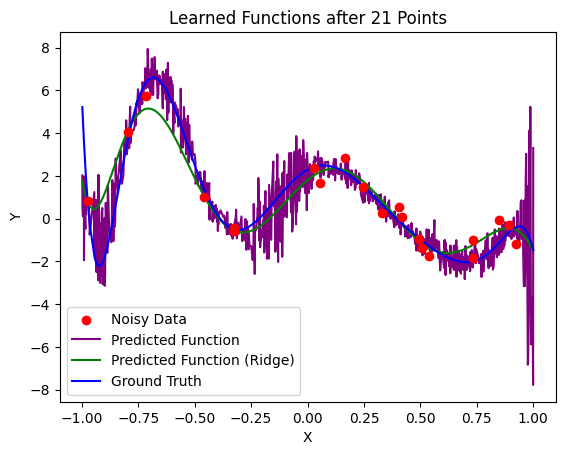

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 26])


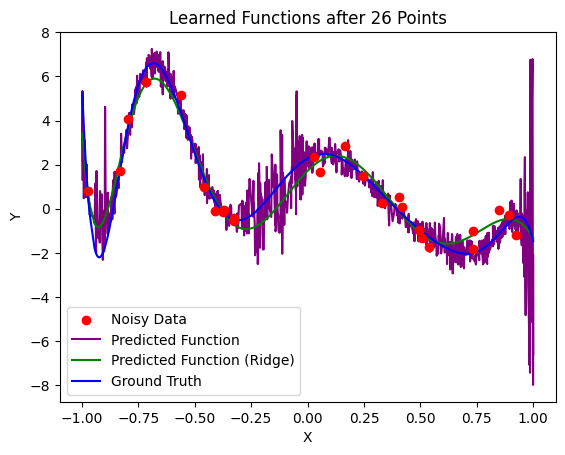

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 31])


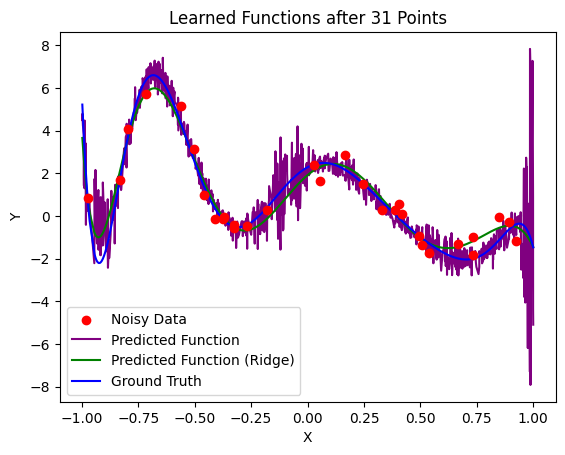

A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 36])


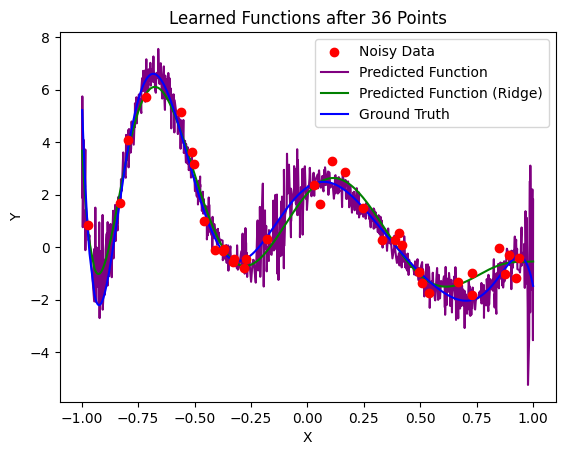

In [4]:
sampler = UniformSampler(n_dims=1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1, basis_dim=9, different_degrees=False, lowest_degree=9, highest_degree=9)
run_id = "standard-0.00005-lr-no-noise"  
run_dir = "../models"
task_name = "kernel_linear_regression"
run_path = os.path.join(run_dir, task_name, run_id)
model, conf = get_model_from_run(run_path, -1)
transformer_model = model.cuda().eval()
more_xs_for_graphing_truth = sampler.sample_xs(1000, 1)
all_xs = sampler.sample_xs(40, 1)
extra_ys = task.evaluate(more_xs_for_graphing_truth, noise=False)
all_ys = task.evaluate(all_xs, noise=False)
model = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=9)
model_no_ridge = ChebyshevKernelLeastSquaresModel(basis_dim=9)
extra_indices = np.argsort(more_xs_for_graphing_truth.squeeze())
graphing_x = more_xs_for_graphing_truth.squeeze()[extra_indices]
extra_ys = extra_ys.squeeze()
extra_ys = extra_ys[extra_indices]
for i in range(1, 40, 5):
    xs = all_xs[:,:i,:]
    ys = all_ys[:,:i]
    extra_transformer_estimated = get_imputed_ys(transformer_model, task, xs, more_xs_for_graphing_truth, smoothing=0)
    extra_predicted = model.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    no_ridge_predicted = model_no_ridge.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    extra_predicted = extra_predicted.squeeze()
    extra_transformer_estimated = extra_transformer_estimated.squeeze()
    no_ridge_predicted = no_ridge_predicted.squeeze()
    extra_transformer_estimated = extra_transformer_estimated[extra_indices]
    extra_predicted = extra_predicted[extra_indices]
    no_ridge_predicted = no_ridge_predicted[extra_indices]  
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Learned Functions after ' + str(i) + ' Points')
    ax.scatter(xs.squeeze(), ys.squeeze(), color='red', label='Noisy Data',zorder=3000)
    ax.plot(graphing_x, extra_transformer_estimated, color='purple', label='Predicted Function')
    ax.plot(graphing_x, extra_predicted, color='green', label='Predicted Function (Ridge)', zorder=1000)
    ax.plot(graphing_x, extra_ys, color='blue', label='Ground Truth',zorder=2000)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    plt.savefig("drawing/points-" + str(i) + ".png", dpi=300, bbox_inches='tight')
    plt.show()


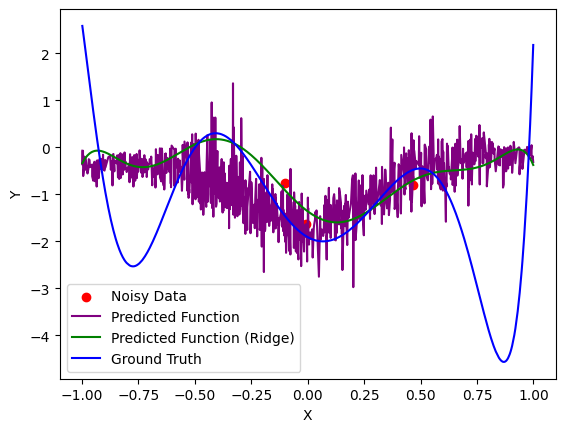